Ce code génére des observations y et l'état du système x_true au cours du temps (d'un instant initial t0 jusqu'à un temps T) à partir des valeurs R et Q défini. Le filtre de Kalman et le lissage de Kalman réalisé par la suite sur ces données sont réalisés en faisant varier la valeur de R. A partir des resultats on va calculer la métrique, la log-vraisamblance et la coverage probility.

Dans cette partie on défini les données et on génère les observations et l'état du système à partir de R et Q

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time

np.random.seed(5)

# Données
T=1000 # Nombre d'itérations
Q_true=1 # Matrice de covaraince de eta (ici scalaire)
R_true=1 # Matrice de covariance de epsilon (ici scalaire)
N=1000 #Nombre de valeurs de R différentes 
RMSE=np.zeros(N) # Vecteur stockant la métrique pour chaque R
LL=np.zeros(N) # Vecteur stockant la log-vraisemblance pour chaque valeur de R
CP=np.zeros(N) #Vecteur stockant la coverage probability pour chaque valeur de R

# Generate true state and noisy observation
x_true=np.zeros(T) # Vecteur de l'état du système à chaque instant t
y=np.zeros(T) #Vecteur des observations à chaque instant t
for t in range(T):
    x_true[t]=0.95*x_true[t-1]+np.random.normal(0,Q_true)
    y[t]=x_true[t]+np.random.normal(0,R_true)


On crée un vecteur possédant un nombre N de valeurs de R différentes puis on va appliquer le filtre de Kalman et le lissage de Kalman à chacune d'entre elle

In [8]:
# Vecteur regroupant N valeur de R
R_var=np.linspace(0.01,4,N)

# Calcul du temps d'execution pour effectuer N fois
# le filtre de Kalman et le lissgae de Kalman pour
# un R différent à chaque itération

t1=time.time()

# Boucle sur le nombre d'élément dans le vecteur R_var
for r in range(N):
    #Kalman filter

    #initial condition
    xb=x_true[0]
    B=1

    # Filter Parameters 
    M=0.95
    Q=Q_true
    H=1
    R=R_var[r]

    # Kalman filter (forward)
    xf=np.zeros(T);Pf=np.zeros(T);xa=np.zeros(T);Pa=np.zeros(T)
    for t in range(T):
        if t==0:
            xf[t]=xb
            Pf[t]=B
        else:
            xf[t]=M*xa[t-1]
            Pf[t]=M**2*Pa[t-1]+Q
        K=Pf[t]*H/(H**2*Pf[t]+R)
        xa[t]=xf[t]+K*(y[t]-H*xf[t])
        Pa[t]=(1-K*H)*Pf[t]
    LL[r]=np.sum(-(y-H*xf)**2/(2*H**2*Pf+R)-0.5*(np.log(np.abs(H**2*Pf+R))+T*np.log(2*np.pi)))

    # Kalman smoother
    xs=np.zeros(T);Ps=np.zeros(T)
    for t in range(T-1,-1,-1):
        if t==T-1:
            xs[t]=xa[t]
            Ps[t]=Pa[t]
        else:
            Ks=Pa[t]*M/Pf[t+1]
            xs[t]=xa[t]+Ks*(xs[t+1]-xf[t+1])
            Ps[t]=Pa[t]+Ks**2*(Ps[t+1]-Pf[t+1])
        
    # Coverage Probability
        if(xs[t]-0.64*np.sqrt(Ps[t])<= x_true[t]) and (xs[t]+0.64*np.sqrt(Ps[t])>=x_true[t]):
            CP[r]=CP[r]+1
    CP[r]=(CP[r]/T)*100

    # RMSE
    RMSE[r]=np.sqrt(np.sum((x_true-xs)**2)/T)

# Affichage temps de calcul
t2=time.time()-t1
print("Temps d'éxecution:",t2,"s")





Temps d'éxecution: 16.04210329055786 s


Affichage de la RMSE

La valeur de R_true est :  1
RMSE est minimum pour R= 0.9605705705705706


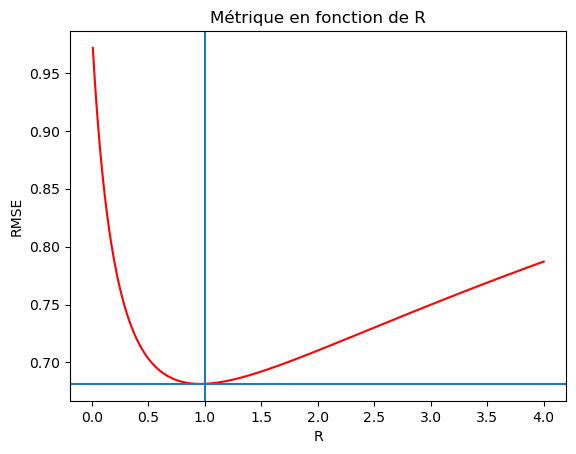

In [9]:
# Affichage de la RMSE
plt.plot(R_var,RMSE,"r")
plt.title("Métrique en fonction de R")
plt.xlabel("R")
plt.ylabel("RMSE")
plt.axvline(x=R_true)
plt.axhline(y=np.min(RMSE))

# Indice pour le plus petit RMSE
ind=np.argmin(RMSE)
print("La valeur de R_true est : ",R_true)
print("RMSE est minimum pour R=",R_var[ind])
plt.savefig('C:/M2_CSM/Stage/Stage/Codes/Notebook/RMSERvar.png')

Affichage de la log-vraisemblance


La log-vraisemblance est maximum pour R= 0.8966666666666667


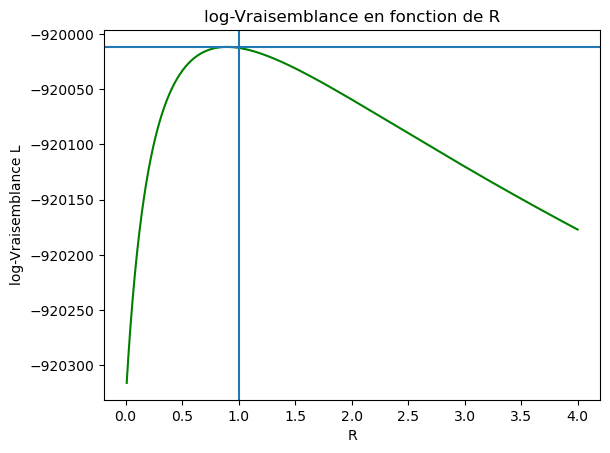

In [10]:
plt.figure()
plt.plot(R_var,LL,"g")
plt.title("log-Vraisemblance en fonction de R")
plt.xlabel("R")
plt.ylabel("log-Vraisemblance L")

plt.axvline(x=R_true)
plt.axhline(y=np.max(LL))


# Indice pour la log-vraisemblance
indl=np.argmax(LL)
print("La log-vraisemblance est maximum pour R=",R_var[indl])
plt.savefig('C:/M2_CSM/Stage/Stage/Codes/Notebook/LLRvar.png')

Affichage de la coverage probability

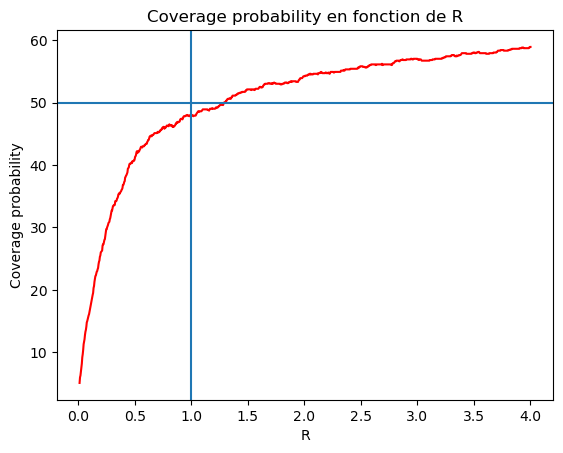

In [11]:
# Covergage probability
plt.figure()
plt.plot(R_var,CP,"r")
plt.title("Coverage probability en fonction de R")
plt.xlabel("R")
plt.ylabel("Coverage probability")

plt.axhline(y=50)
plt.axvline(x=R_true)
plt.savefig('C:/M2_CSM/Stage/Stage/Codes/Notebook/CPRvar.png')

Affichage de la RMSE, de la log-vraisemblance et de la coverage probability sur un même graphique

Text(0, 0.5, 'Coverage probability')

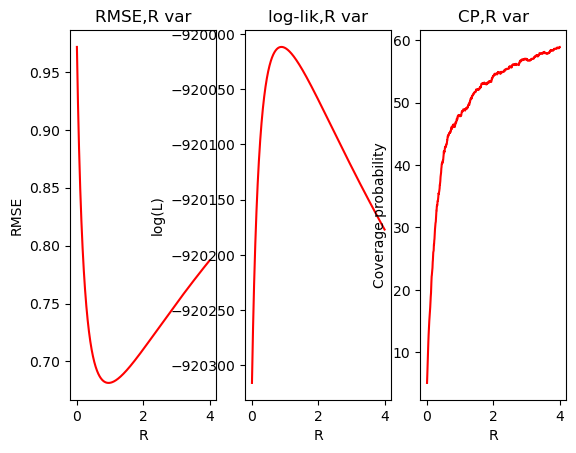

In [12]:
plt.subplot(131)
plt.plot(R_var,RMSE,"r")
plt.title("RMSE,R var")
plt.xlabel("R")
plt.ylabel("RMSE")

plt.subplot(132)
plt.plot(R_var,LL,"r")
plt.title("log-lik,R var")
plt.xlabel("R")
plt.ylabel("log(L)")
  
plt.subplot(133)
plt.plot(R_var,CP,"r")
plt.title("CP,R var")
plt.xlabel("R")
plt.ylabel("Coverage probability")